<h1 style="text-align:center;font-size:36px;font-weight:bold;">How to calculate shear</h1>

In [1]:
import datetime
print('Last updated: {}'.format(datetime.date.today().strftime('%d %B, %Y')))

Last updated: 15 October, 2024


<font size="6">**Outline:**</font>

**The brightwind library allows for shear to be calculated from wind speed measurements using either the power law or the logarithmic law, through the calculation of the shear exponent (alpha) or the roughness coefficient respectively. Alpha/roughness values can be calculated by average wind speed, time of day/month, direction sector or by individual timestamp. The calculated shear can then be applied to wind speed timeseries to scale the wind speeds from one height to another.**

**This tutorial will cover:**

1.How to calculate average shear and use it to scale a wind speed timeseries.

2.How to calculate shear by direction sector.

3.How to calculate shear by time of day and month.

4.How to calculate shear by individual timestamp.

5.How to scale a wind speed timeseries using a predefined value of alpha/roughness.

<font size="6">Step 1: Calculate average shear and scale a wind speed timeseries</font>

The average shear exponent can be calculated across an entire timeseries using the Average class in the brightwind library.

First, upload the relevant data, defining the anemometers data and heights of these anemometers.

In [3]:
import brightwind as bw
import pprint

# load data as dataframe and apply cleaning (see previous tutorials for these.)
data = bw.load_csv(r'E:\Programs\brightwind\brightwind\demo_datasets\demo_data.csv')
data = bw.apply_cleaning(data, r'E:\Programs\brightwind\brightwind\demo_datasets\demo_cleaning_file.csv')

# Specify columns in data which contain the anemometer measurements from which to calculate shear
anemometers = data[['Spd80mN','Spd60mN','Spd40mN']]

# Specify the heights of these anemometers in a list
heights = [80, 60, 40]

To calculate average shear from the data contained in anemometers using the power law, type the following:

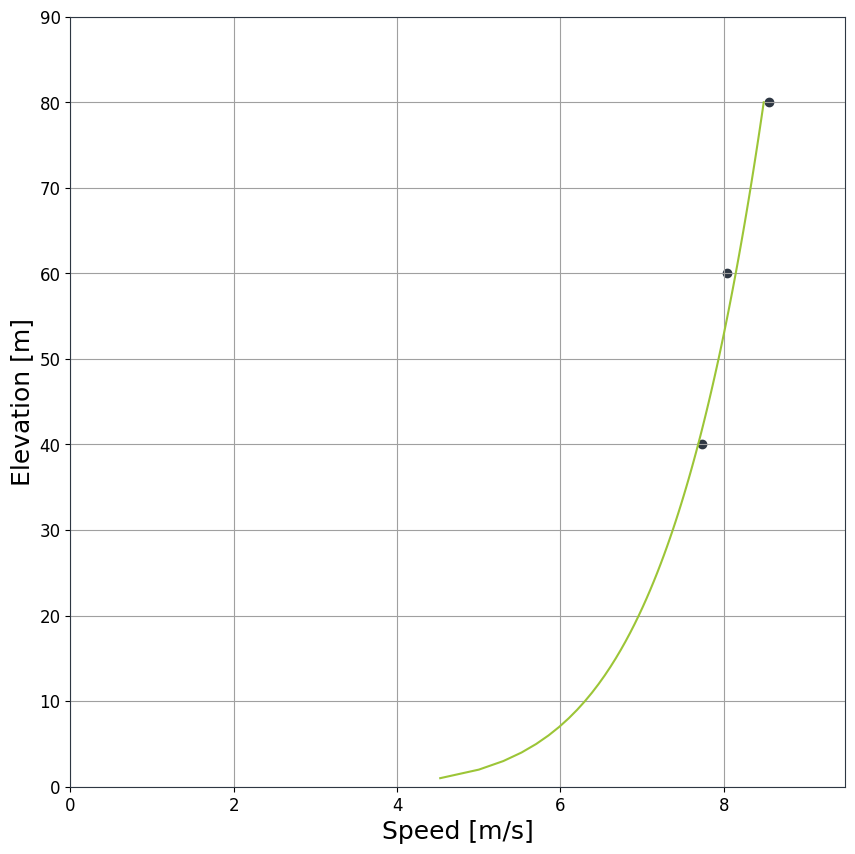

In [4]:
avg_shear_by_power_law = bw.Shear.Average(anemometers, heights)

To calculate shear using the log law instead of the power law, simply add the argument calc_method='log_law'. This is an option for all shear calculations.

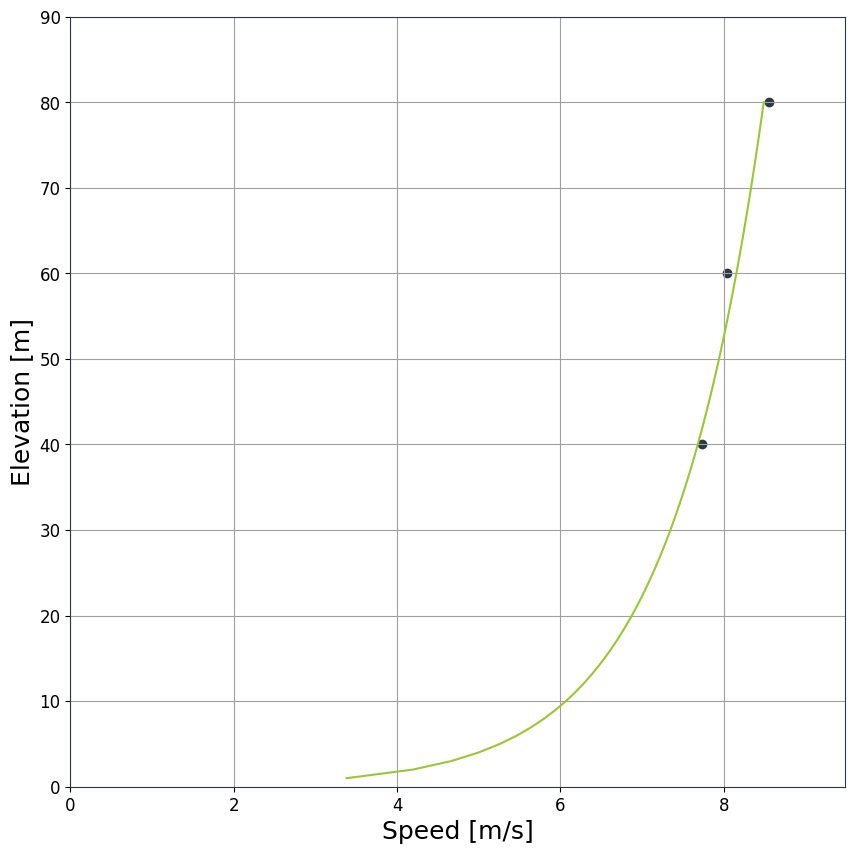

In [12]:
avg_shear_by_log_law = bw.Shear.Average(anemometers, heights, calc_method='log_law')

This function returns an object, i.e. avg_shear_by_power_law or avg_shear_by_log_law, which contains lots of information about the calculation that was carried out.

To view what information is available, such as a plot and the average alpha value, type the following and press ‘Tab’:

To show the average alpha calculated, type:

In [13]:
avg_shear_by_power_law.alpha

0.14342929058609138

To show the average roughness calculated, type:

In [14]:
avg_shear_by_log_law.roughness

0.054854089027592125

To show the plot, type:

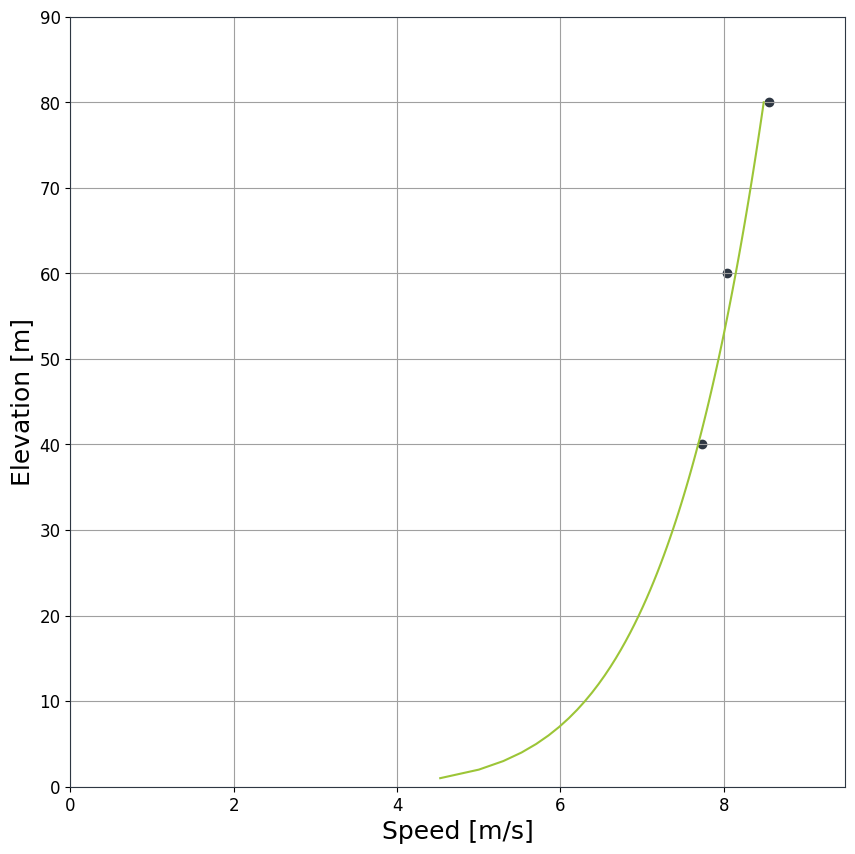

In [15]:
avg_shear_by_power_law.plot

Other useful information about the object can be obtained using .info. This is wrapped with the ‘pretty print’ library to make it more readable.

In [16]:
pprint.pprint(avg_shear_by_log_law.info)

{'input data': {'calculation_method': 'log_law',
                'input_wind_speeds': {'column_names': ['Spd80mN',
                                                       'Spd60mN',
                                                       'Spd40mN'],
                                      'heights': [80, 60, 40],
                                      'min_spd': 3}},
 'output data': {'concurrent_period': 1.511, 'roughness': 0.054854089027592125}}


Once the alpha/roughness values have been calculated, they can be applied to a wind speed timeseries to scale the wind speeds from one height to another.

To scale the wind speed timeseries, i.e. data['Spd80mN'], from 80 m to 100 m height using the average alpha value previously calculated, use the .apply() function attached to the avg_shear_by_power_law object.

In [20]:
# .head(10) is simply used to not display so much data
avg_shear_by_power_law.apply(data['Spd80mN'], 80, 120).head(10)

Timestamp
2016-01-09 15:30:00         NaN
2016-01-09 15:40:00         NaN
2016-01-09 17:00:00         NaN
2016-01-09 17:10:00    7.824033
2016-01-09 17:20:00    8.454662
2016-01-09 17:30:00    8.839398
2016-01-09 17:40:00    8.616823
2016-01-09 17:50:00    7.927901
2016-01-09 18:00:00    8.006333
2016-01-09 18:10:00    8.712213
Name: Spd80mN_scaled_to_120m, dtype: float64

To scale the same data, but using the roughness value calculated via the log law, use the .apply() function attached to the avg_shear_by_log_law object:

In [21]:
avg_shear_by_log_law.apply(data['Spd80mN'], 80, 120).head(10)

Timestamp
2016-01-09 15:30:00         NaN
2016-01-09 15:40:00         NaN
2016-01-09 17:00:00         NaN
2016-01-09 17:10:00    7.792858
2016-01-09 17:20:00    8.420974
2016-01-09 17:30:00    8.804177
2016-01-09 17:40:00    8.582489
2016-01-09 17:50:00    7.896312
2016-01-09 18:00:00    7.974431
2016-01-09 18:10:00    8.677498
Name: Spd80mN_scaled_to_120m, dtype: float64

This sheared up wind speed timeseries can also be assigned to a new variable in your DataFrame.

In [23]:
data['Spd100m'] = avg_shear_by_power_law.apply(data['Spd80mN'], 80, 120)
data.Spd100m.head(10)

Timestamp
2016-01-09 15:30:00         NaN
2016-01-09 15:40:00         NaN
2016-01-09 17:00:00         NaN
2016-01-09 17:10:00    7.824033
2016-01-09 17:20:00    8.454662
2016-01-09 17:30:00    8.839398
2016-01-09 17:40:00    8.616823
2016-01-09 17:50:00    7.927901
2016-01-09 18:00:00    8.006333
2016-01-09 18:10:00    8.712213
Name: Spd100m, dtype: float64

It is also possible to plot the two shear profiles using both calculation methods overlaid on each other using the argument plot_both. In addition, the profiles can be extended up to any height using max_plot_height. The apply function will only apply the resulting shear based on the calc_method specified, in this case ‘power_law’.

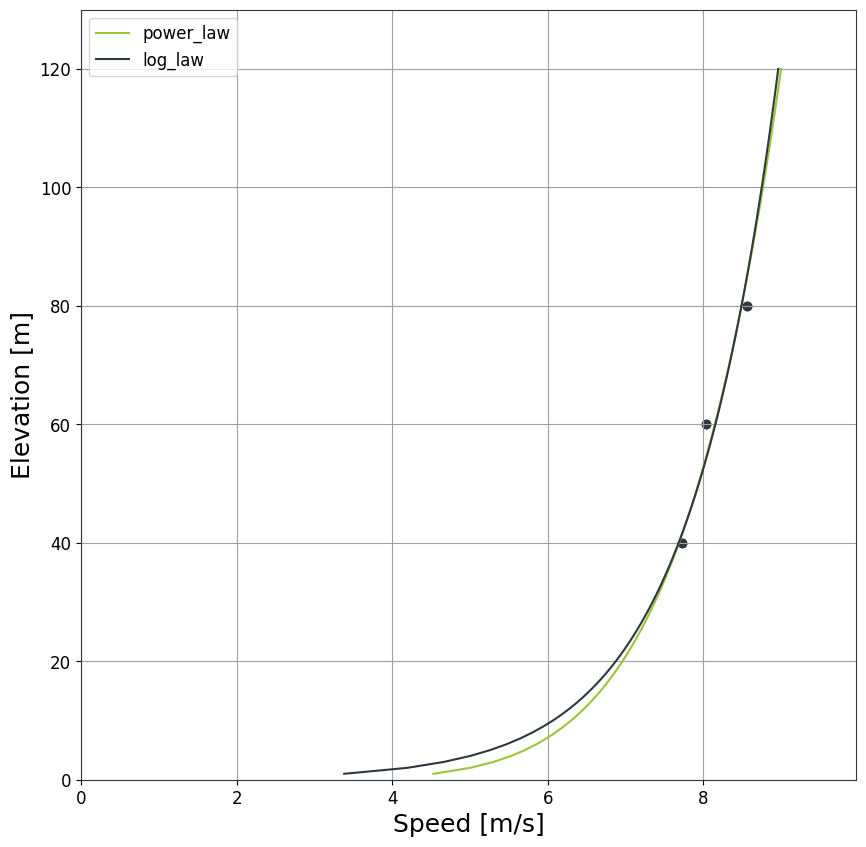

In [24]:
avg_shear_by_power_law = bw.Shear.Average(anemometers, heights, plot_both=True,
                                          max_plot_height=120)

<font size="6">Step 2: Calculate shear by direction sector</font>

If you have direction measurements to accompany wind speed measurements, the shear can be calculated for specified direction sectors using the BySector class.

To calculate the shear by direction sector, simply type:

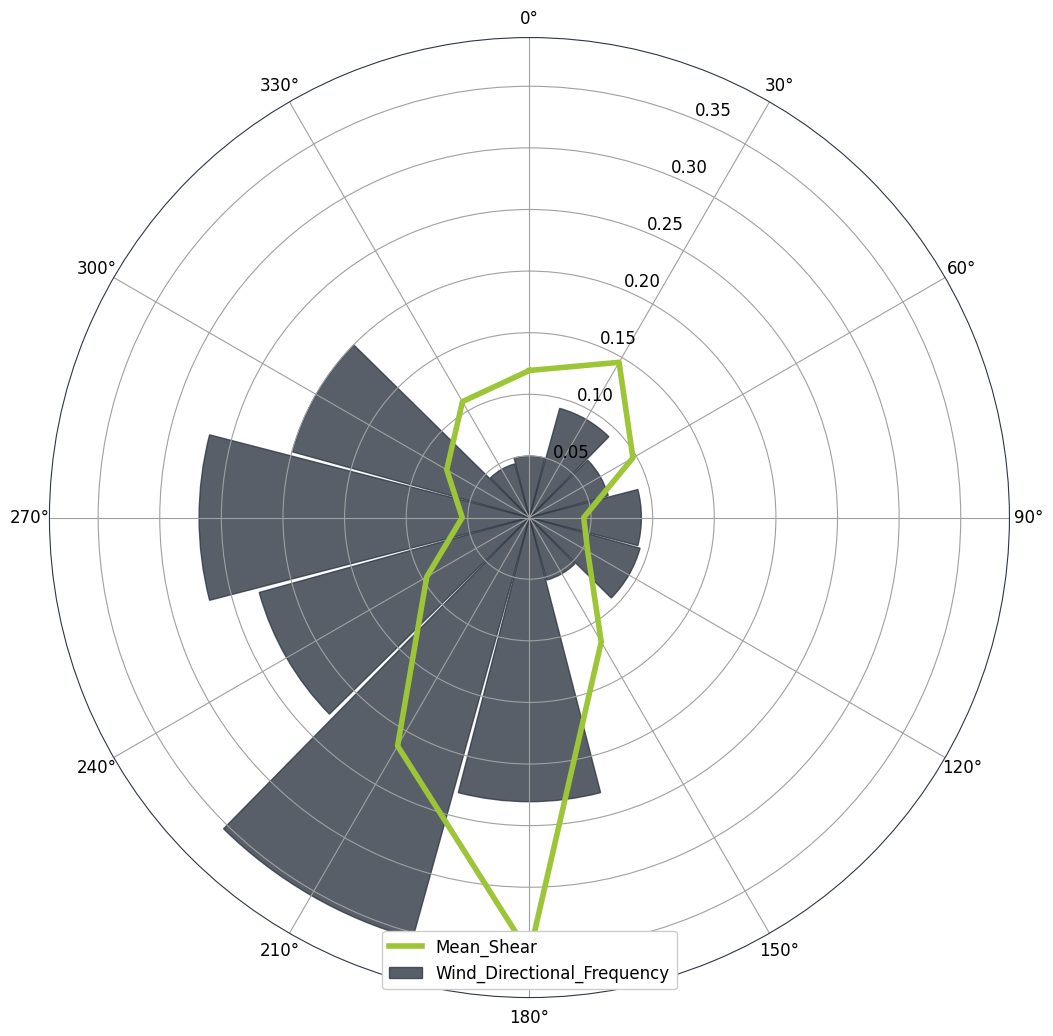

In [26]:
shear_by_sector_power_law = bw.Shear.BySector(anemometers, heights, data['Dir78mS'])

Again, various information such as the alpha values can be displayed from this object:

In [27]:
shear_by_sector_power_law.alpha

345.0-15.0     0.119370
15.0-45.0      0.145463
45.0-75.0      0.096945
75.0-105.0     0.044056
105.0-135.0    0.054538
135.0-165.0    0.116558
165.0-195.0    0.354113
195.0-225.0    0.213977
225.0-255.0    0.096221
255.0-285.0    0.054575
285.0-315.0    0.077513
315.0-345.0    0.108680
Name: alpha, dtype: float64



•The direction bins can be defined by the user for use in the BySector calculations.

•These bins must begin at 0, be listed as increasing and advise they are even sizes.

•For example, to use the custom bins [0,30,60,90,120,150,180,210,240,270,300,330,360], simply type the following:

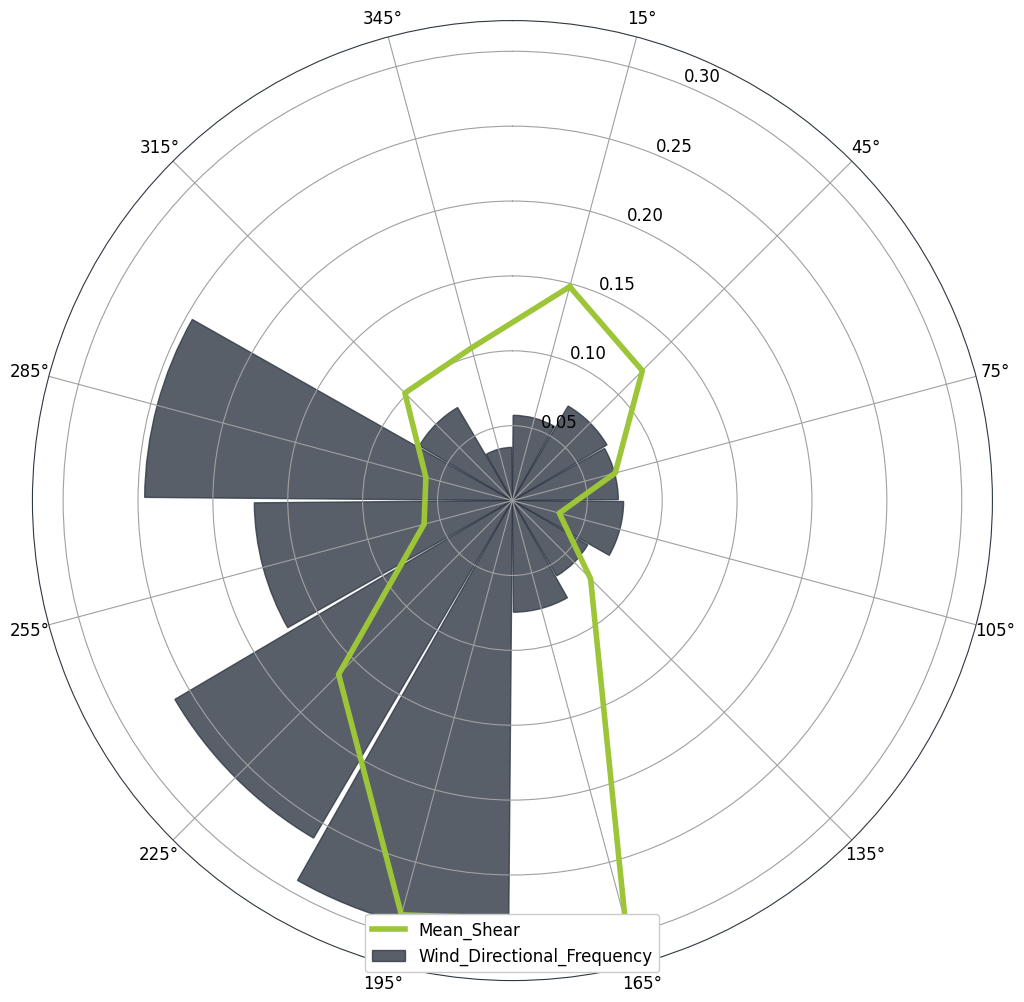

In [28]:
custom_bins = [0,30,60,90,120,150,180,210,240,270,300,330,360]
shear_by_sector_power_law_custom_bins = bw.Shear.BySector(anemometers, heights, data['Dir78mS'],
                                                          direction_bin_array=custom_bins)

In [29]:
shear_by_sector_power_law.alpha

345.0-15.0     0.119370
15.0-45.0      0.145463
45.0-75.0      0.096945
75.0-105.0     0.044056
105.0-135.0    0.054538
135.0-165.0    0.116558
165.0-195.0    0.354113
195.0-225.0    0.213977
225.0-255.0    0.096221
255.0-285.0    0.054575
285.0-315.0    0.077513
315.0-345.0    0.108680
Name: alpha, dtype: float64

To scale the same data, but using the alpha values calculated for each direction section use the .apply() function attached to the shear_by_sector_by_power_law object. Corresponding wind direction measurements for the wind speeds to be scaled must also be passed to the function.

•Using data['Dir78mS'] as the direction measurements, type:

In [30]:
shear_by_sector_power_law.apply(data['Spd80mN'], data['Dir78mS'], 80, 100).head(10)

Timestamp
2016-01-09 17:10:00     7.472387
2016-01-09 17:20:00     8.074672
2016-01-09 17:30:00     8.442117
2016-01-09 17:40:00     8.229546
2016-01-09 17:50:00     7.571587
2016-01-09 18:00:00     7.646493
2016-01-09 18:10:00     8.320648
2016-01-09 18:20:00     9.535341
2016-01-09 18:30:00    10.031341
2016-01-09 18:40:00    10.517218
Name: Spd80mN_scaled_to_100m, dtype: float64

<font size="6">Step 3: Calculate shear by time of day and month</font>

*Shear can also be calculated by time of day and month using the TimeOfDay class. To do so, type:*

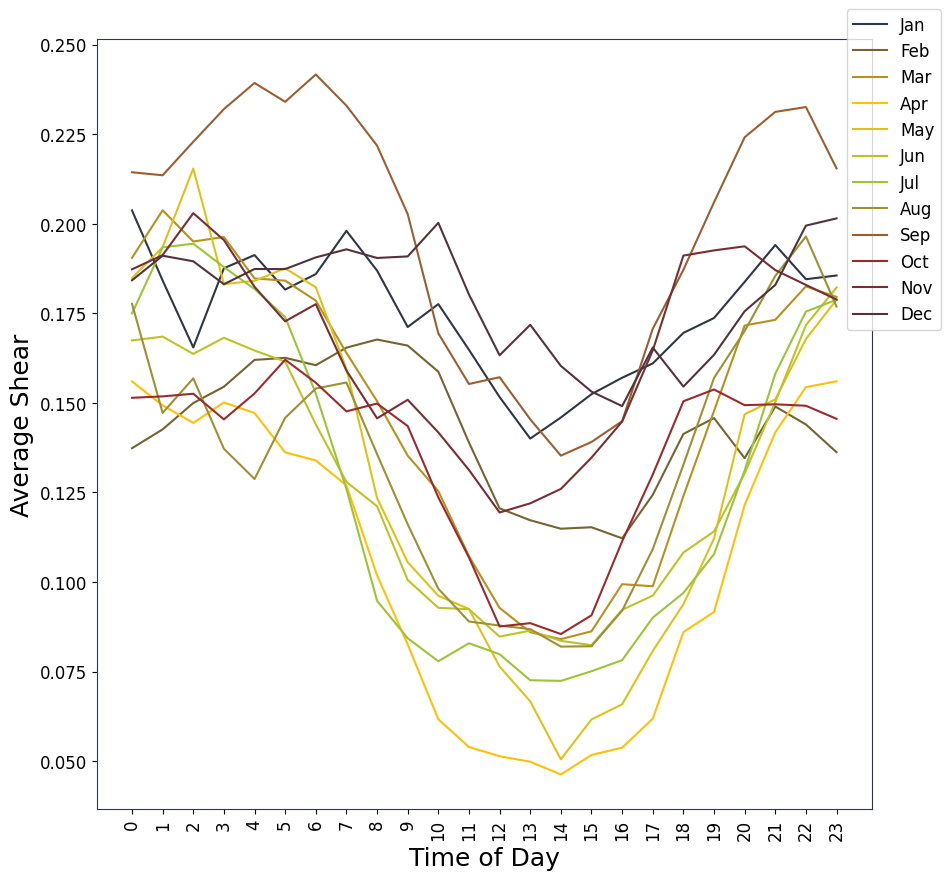

In [33]:
shear_by_tod_power_law = bw.Shear.TimeOfDay(anemometers, heights, segments_per_day=24,
                                            plot_type='line')

**The alpha values calculated are saved in a DataFrame and can be accessed using .alpha():**

In [35]:
shear_by_tod_power_law.alpha

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
segment_start_time,,,,,,,,,,,,
00:00:00,0.203745,0.137365,0.190512,0.156005,0.184894,0.167457,0.174981,0.177678,0.214404,0.151436,0.187305,0.184245
01:00:00,0.184187,0.142620,0.203802,0.149316,0.193490,0.168509,0.193434,0.147225,0.213561,0.151838,0.191275,0.191104
02:00:00,0.165501,0.149974,0.195065,0.144426,0.215443,0.163694,0.194465,0.156861,0.222912,0.152570,0.202989,0.189549
03:00:00,0.187611,0.154534,0.196334,0.150126,0.183169,0.168200,0.187914,0.137204,0.232028,0.145416,0.195471,0.183143
04:00:00,0.191284,0.162013,0.184757,0.147184,0.184090,0.164632,0.181813,0.128768,0.239333,0.152643,0.182418,0.187397
05:00:00,0.181648,0.162595,0.184140,0.136194,0.187579,0.161545,0.173963,0.145848,0.234071,0.162066,0.172788,0.187372
06:00:00,0.185978,0.160536,0.178574,0.133937,0.182293,0.144034,0.152627,0.154029,0.241704,0.155654,0.177581,0.190635
07:00:00,0.198043,0.165445,0.163970,0.126975,0.159511,0.127946,0.126003,0.155703,0.232996,0.147648,0.159044,0.192888
08:00:00,0.186950,0.167700,0.150501,0.101867,0.123486,0.121164,0.094774,0.135711,0.221852,0.149835,0.145703,0.190476


Arguments such as segments_per_day and segement_start_time can be set to specify the number of time period segments in a day and the start time of the first segment. Different plot types are also available, such as 'step' and '12x24', shown below.

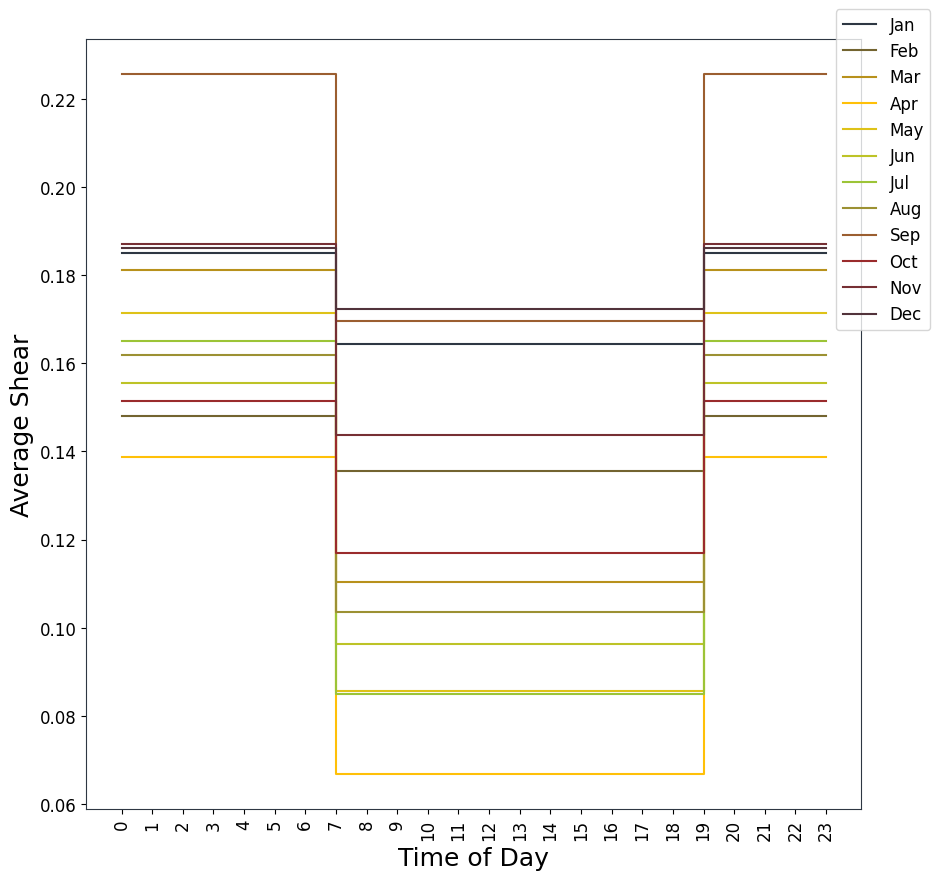

In [36]:
shear_by_tod_power_law = bw.Shear.TimeOfDay(anemometers, heights, segments_per_day=2,
                                            segment_start_time=7, plot_type='step')

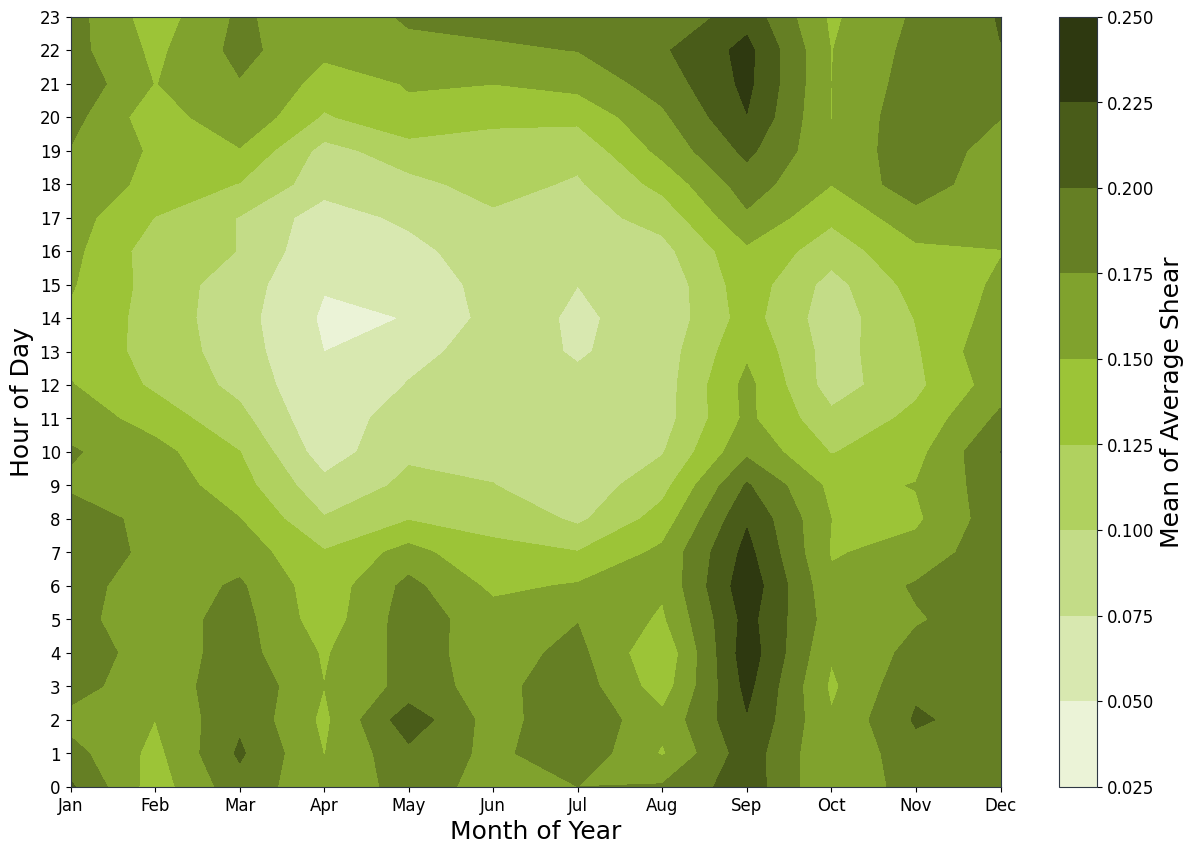

In [37]:
shear_by_tod_power_law = bw.Shear.TimeOfDay(anemometers, heights, segments_per_day=24,
                                            segment_start_time=7, plot_type='12x24')

By setting by_month=False, shear is averaged over all months for each daily segment:

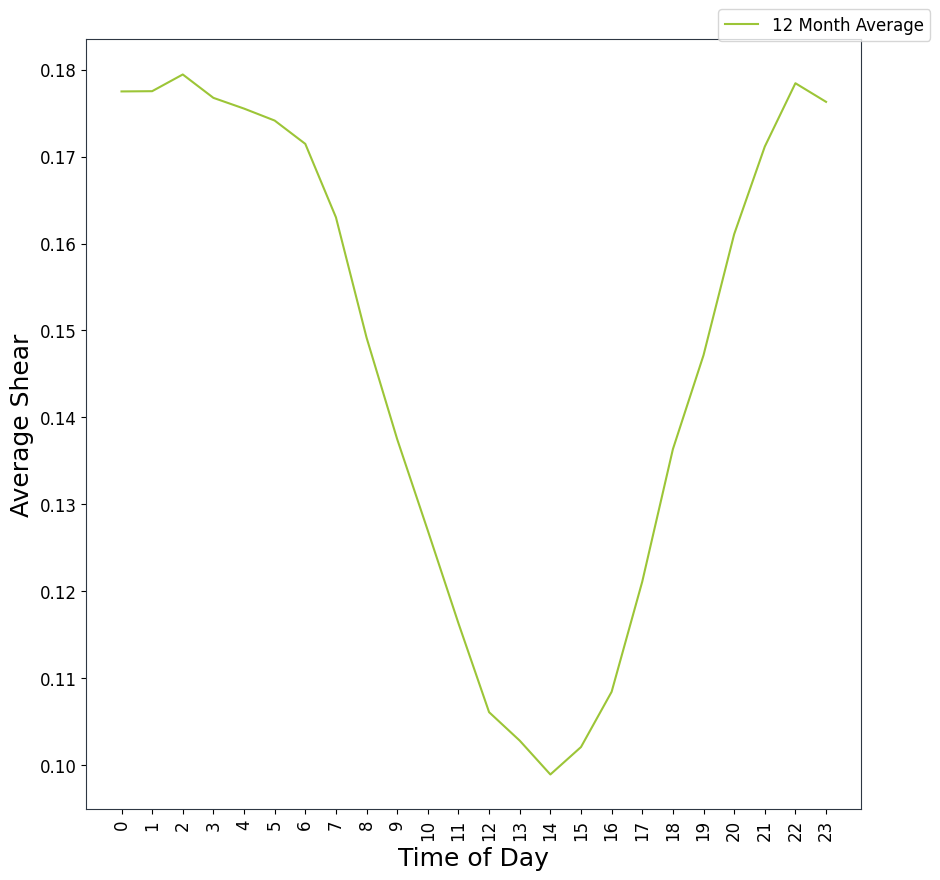

In [38]:
shear_by_tod_power_law = bw.Shear.TimeOfDay(anemometers, heights, segments_per_day=24,
                                            segment_start_time=7, by_month=False,
                                            plot_type='line')

To apply the shear values calculated, as previously:

In [39]:
shear_by_tod_power_law.apply(data['Spd80mN'],80,100).head(10)

FloatProgress(value=0.0, bar_style='success', description='Calculating', max=288.0)

2016-01-09 15:30:00         NaN
2016-01-09 15:40:00         NaN
2016-01-09 17:00:00         NaN
2016-01-09 17:10:00    7.584182
2016-01-09 17:20:00    8.195478
2016-01-09 17:30:00    8.568421
2016-01-09 17:40:00    8.352669
2016-01-09 17:50:00    7.684866
2016-01-09 18:00:00    7.787329
2016-01-09 18:10:00    8.473901
Name: Spd80mN_scaled_to_100m, dtype: float64

<font size="6">Step 4: Calculating shear by timestamp</font>

Shear can be calculated for each individual timestamp of a wind speed data series using the TimeSeries class. This takes some time, as tens of thousands of calculations must be carried out, so try it first on a subset of the data, i.e. the first 1000 entries. To do so, type:

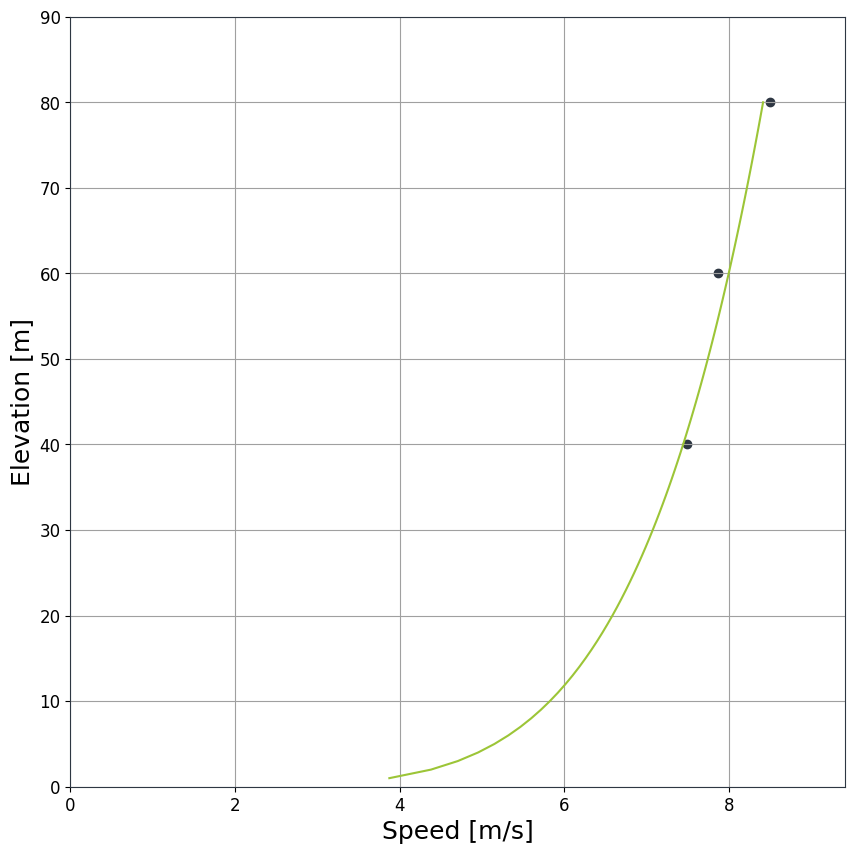

In [42]:
anemometers_subset = anemometers[:1000]
ts_by_power_law = bw.Shear.TimeSeries(anemometers_subset, heights)

In other methods such as Average and BySector, shear is only calculated for each timestamp where an anemometer reading exists at each height. This can be problamatic when calculating shear by individual timestamps. To maximise the ammount of data used for shear calculations and increase coverage we can calculate shear for every timestamp where two or more anemometer readings exist. If you wish to do this, pass the maximise_data=True argument to the function. Please be aware that due to the nature of calculating shear for every timestamp, this function takes some time to run.

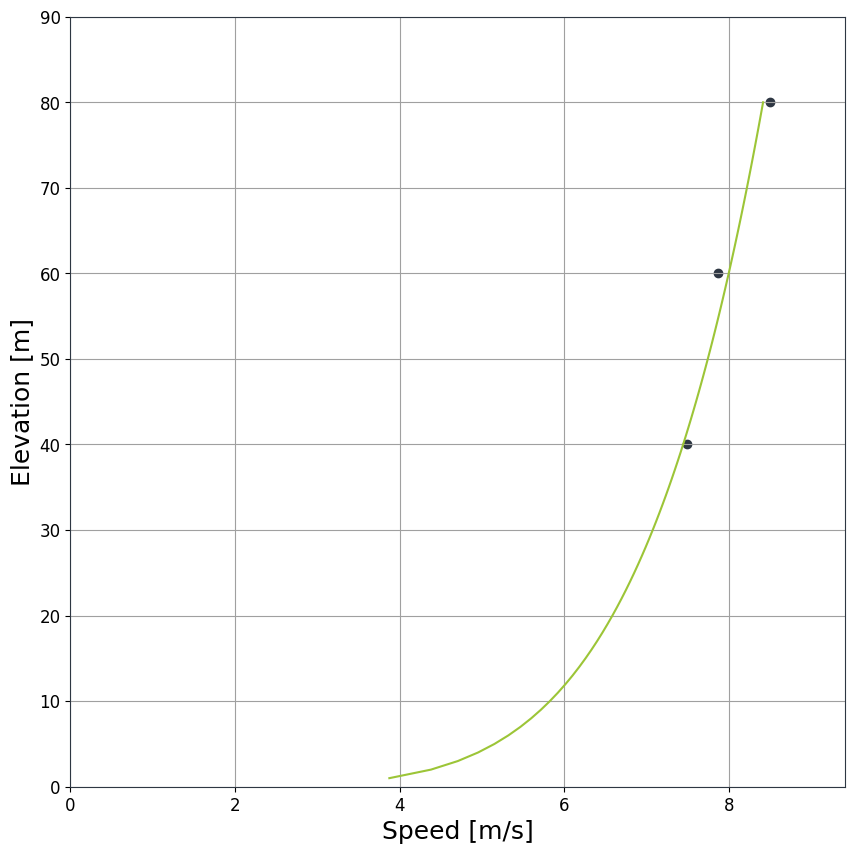

In [43]:
ts_by_power_law_max = bw.Shear.TimeSeries(anemometers_subset, heights, maximise_data=True)

As can be seen in the .info of each object, the coverage increased when maximise_data was used.

In [44]:
pprint.pprint(ts_by_power_law.info)

{'input data': {'calculation_method': 'power_law',
                'input_wind_speeds': {'column_names': ['Spd80mN',
                                                       'Spd60mN',
                                                       'Spd40mN'],
                                      'heights': [80, 60, 40],
                                      'min_spd': 3}},
 'output data': {'alpha': Timestamp
2016-01-09 17:10:00    0.237991
2016-01-09 17:20:00   -0.027865
2016-01-09 17:30:00    0.002393
2016-01-09 17:40:00    0.028834
2016-01-09 17:50:00   -0.028915
                         ...   
2016-01-16 14:10:00   -0.225709
2016-01-16 14:20:00   -0.182183
2016-01-16 14:30:00   -0.135083
2016-01-16 14:40:00    0.122002
2016-01-16 15:10:00    0.117299
Name: alpha, Length: 846, dtype: float64,
                 'concurrent_period': 0.016}}


In [45]:
pprint.pprint(ts_by_power_law_max.info)

{'input data': {'calculation_method': 'power_law',
                'input_wind_speeds': {'column_names': ['Spd80mN',
                                                       'Spd60mN',
                                                       'Spd40mN'],
                                      'heights': [80, 60, 40],
                                      'min_spd': 3}},
 'output data': {'alpha': Timestamp
2016-01-09 17:10:00    0.237991
2016-01-09 17:20:00   -0.027865
2016-01-09 17:30:00    0.002393
2016-01-09 17:40:00    0.028834
2016-01-09 17:50:00   -0.028915
                         ...   
2016-01-16 14:10:00   -0.225709
2016-01-16 14:20:00   -0.182183
2016-01-16 14:30:00   -0.135083
2016-01-16 14:40:00    0.122002
2016-01-16 15:10:00    0.117299
Name: alpha, Length: 846, dtype: float64,
                 'concurrent_period': 0.017}}


To apply the alpha values calculated to a wind series with corresponding timestamps:

In [46]:
ts_by_power_law.apply(data['Spd80mN'], 80, 100).head(10)

Timestamp
2016-01-09 17:10:00     7.784625
2016-01-09 17:20:00     7.927554
2016-01-09 17:30:00     8.344454
2016-01-09 17:40:00     8.182478
2016-01-09 17:50:00     7.431892
2016-01-09 18:00:00     7.543394
2016-01-09 18:10:00     8.364604
2016-01-09 18:20:00     9.378512
2016-01-09 18:30:00    10.248585
2016-01-09 18:40:00    10.577334
Name: Spd80mN_scaled_to_100m, dtype: float64

<font size="6">Step 5: Scale a wind speed timeseries using a predefined value of alpha/roughness</font>

A wind speed timeseries can also be scaled using a user-defined fixed value for alpha or roughness.

For example, to scale the wind speed measurements, data['Spd80mN'], from 80 m to 100 m, using an alpha value of 0.2, type:

In [49]:
bw.Shear.scale(data['Spd80mN'], 80, 100, alpha=0.2).head(10)

Timestamp
2016-01-09 15:30:00         NaN
2016-01-09 15:40:00         NaN
2016-01-09 17:00:00         NaN
2016-01-09 17:10:00    7.718911
2016-01-09 17:20:00    8.341067
2016-01-09 17:30:00    8.720634
2016-01-09 17:40:00    8.501050
2016-01-09 17:50:00    7.821384
2016-01-09 18:00:00    7.898761
2016-01-09 18:10:00    8.595157
Name: Spd80mN, dtype: float64

To scale the wind speed measurements, data['Spd80mN'], from 80 m to 100 m, using a roughness of 0.3, type:

In [50]:
bw.Shear.scale(data['Spd80mN'], 80, 100, roughness=0.3, calc_method='log_law').head(10)

Timestamp
2016-01-09 15:30:00         NaN
2016-01-09 15:40:00         NaN
2016-01-09 17:00:00         NaN
2016-01-09 17:10:00    7.676888
2016-01-09 17:20:00    8.295657
2016-01-09 17:30:00    8.673157
2016-01-09 17:40:00    8.454769
2016-01-09 17:50:00    7.778803
2016-01-09 18:00:00    7.855759
2016-01-09 18:10:00    8.548364
Name: Spd80mN, dtype: float64